# Correlation Bewteen a T.V Show's Genre and Queer Female Character Deaths

Author: Gabriela Zuno


Course Project, UC Irvine, Math 10, Fall 2024


I would like to post my notebook on the course website : Yes

# Introduction

My project will focus on queer female tv show characters. I am a big fan of tv shows, especially when they include characters that I can realte to, in this case queer and female. As much as the shows give representation, it is always sad when there is a character death. I want to figure out if there is a reason for why character deaths, especialy queer characters have become more common. Why do they not get a happy ending?

The data I am using comes from a dataset consisting of TV shows that have queer female characters from kaggle. This data set includes info such as genre, # of episodes, # of gay characters, # of gay character deaths, show start date, show end date, and whether or not people die in the show. I aim to find a correlation between # of gay character deaths and the genre of the show. This all relates to a recurring and infuriating theme present in tv shows known as the "bury your gays" trope which in most media, is found more likely to be the death of a queer female rather than a queer male. 

For simplicity, the word "gay" will refer to queer female characters comprised in the dataset. 

# Data Loading

In [599]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [600]:
data = pd.read_csv('Shows_with_Female_Queer_Characters.csv')
data.head()

,Show Name,# of Episodes,# of Gay Deaths,# of Gay Characters,Genre,Do People Die?,Show Start Date,Show End Date
0,911,79,0,3,Drama,Yes,3/31/2015,4/25/2022
1,13 Reasons Why,49,1,3,Drama,Yes,3/31/2017,6/5/2020
2,1600 Penn,13,0,1,Sitcom,No,12/17/2012,3/28/2013
3,19-2,38,0,1,Crime Drama,Yes,1/29/2014,9/18/2017
4,A Discovery of Witches,25,0,2,Fantasy,Yes,9/14/2018,1/19/2022


# Data Cleaning

In [602]:
# we want to remove the "# of episodes" column as this data will not be used as it is irrelevant

data.columns = data.columns.str.strip()
data = data.drop(columns=["# of Episodes"], errors='ignore')
data.head()

,Show Name,# of Gay Deaths,# of Gay Characters,Genre,Do People Die?,Show Start Date,Show End Date
0,911,0,3,Drama,Yes,3/31/2015,4/25/2022
1,13 Reasons Why,1,3,Drama,Yes,3/31/2017,6/5/2020
2,1600 Penn,0,1,Sitcom,No,12/17/2012,3/28/2013
3,19-2,0,1,Crime Drama,Yes,1/29/2014,9/18/2017
4,A Discovery of Witches,0,2,Fantasy,Yes,9/14/2018,1/19/2022


# Grouping Data

In [604]:
# Want to group data by shows with 0 gay deaths and shows with >0
# make new column with groups
data['Group'] = 'zero_gay_deaths'
data.loc[data['# of Gay Deaths'] > 0, 'Group'] = 'more_than_zero'  
grouped = data.groupby('Group')
Group = grouped['# of Gay Deaths'].agg(['count'])
print(Group)

                 count
Group                 
more_than_zero      88
zero_gay_deaths    161


Slightly more than half of the tv shows in this set have gay character deaths

In [606]:
data.head()

,Show Name,# of Gay Deaths,# of Gay Characters,Genre,Do People Die?,Show Start Date,Show End Date,Group
0,911,0,3,Drama,Yes,3/31/2015,4/25/2022,zero_gay_deaths
1,13 Reasons Why,1,3,Drama,Yes,3/31/2017,6/5/2020,more_than_zero
2,1600 Penn,0,1,Sitcom,No,12/17/2012,3/28/2013,zero_gay_deaths
3,19-2,0,1,Crime Drama,Yes,1/29/2014,9/18/2017,zero_gay_deaths
4,A Discovery of Witches,0,2,Fantasy,Yes,9/14/2018,1/19/2022,zero_gay_deaths


In [607]:
# Test groups
show_name1 = 'Wentworth'
show_group = data.loc[data['Show Name'] == show_name1, 'Group'].values
print(show_name1, show_group)

show_name2 = 'Glee'
show_group = data.loc[data['Show Name']== show_name2, 'Group'].values
print(show_name2, show_group)
# show_name1 and show_name2 can be interchangeable with any other show that is in the dataset to check what group they are in

Wentworth ['more_than_zero']
Glee ['zero_gay_deaths']


# Bar Graph

Now we want to see a graph representation of how many shows have zero gay deaths and how many shows do have them. 

Text(0.5, 1.0, '# of shows with zero gay deaths vs more than zero gay deaths')

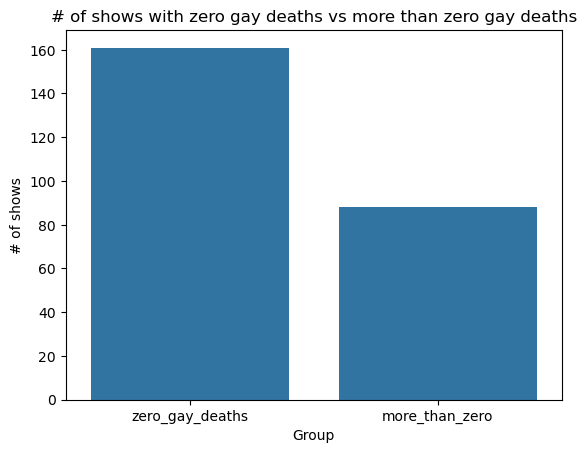

In [610]:
group_counts = data['Group'].value_counts()

sns.barplot(x = group_counts.index, y= group_counts.values)
plt.xlabel('Group')
plt.ylabel('# of shows') 
plt.title('# of shows with zero gay deaths vs more than zero gay deaths')

Here we can see that there is a significantly larger amount of television shows that have zero gay deaths than shows with gay deaths. This includes shows of all genres that are in the dataset. 

# Specifying by genre

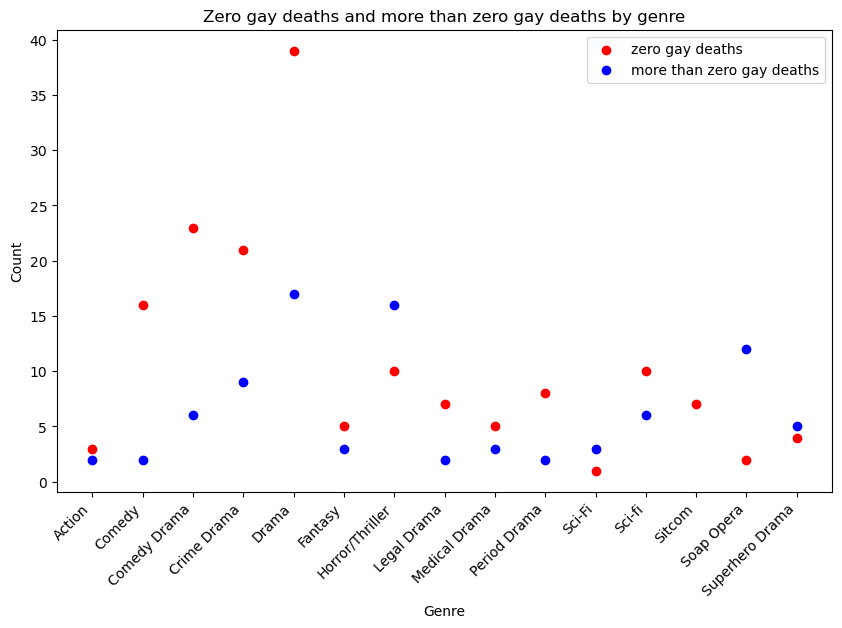

In [613]:
grouped_counts = data.groupby(['Genre', 'Group']).size().reset_index(name='Count') # genre and group

zero_deaths = grouped_counts[grouped_counts['Group'] == 'zero_gay_deaths'] # variable for zero death

more_than_zero = grouped_counts[grouped_counts['Group'] == 'more_than_zero'] #variable for more than zero

plt.figure(figsize=(10, 6))
plt.scatter(zero_deaths['Genre'], zero_deaths['Count'], label='zero gay deaths', color='red') # plot for zero
plt.scatter(more_than_zero['Genre'], more_than_zero['Count'], label='more than zero gay deaths', color='blue') # plot for more

plt.xticks(rotation=45, ha='right') # see genres better
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Zero gay deaths and more than zero gay deaths by genre')
plt.legend()

# Brief Analysis

As we can see, the "Drama" genre has the most amount of shows with zero gay deaths but also has the most amount of gay deaths too. Genre with the least amount of shows with zero deaths is "sci-fi" and the genre with the least shows with deaths is "action". Sub categories of drama also appear to have the most amount of shows with no gay deaths. "Horror/Thriller" is the runner up for most shows with more than zero gay deaths. It is also interesting to see that the "sitcom" genre has no deaths at all, there are 8 shows that fall into the zero gay deaths group and no data for sitcom shows with gay deaths. We can see this more clearly when the scatterplot is seperated into two seperate graphs, one for deaths and the other for no deaths. (shown below)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Comedy Drama'),
  Text(3, 0, 'Crime Drama'),
  Text(4, 0, 'Drama'),
  Text(5, 0, 'Fantasy'),
  Text(6, 0, 'Horror/Thriller'),
  Text(7, 0, 'Legal Drama'),
  Text(8, 0, 'Medical Drama'),
  Text(9, 0, 'Period Drama'),
  Text(10, 0, 'Sci-Fi'),
  Text(11, 0, 'Sci-fi'),
  Text(12, 0, 'Sitcom'),
  Text(13, 0, 'Soap Opera'),
  Text(14, 0, 'Superhero Drama')])

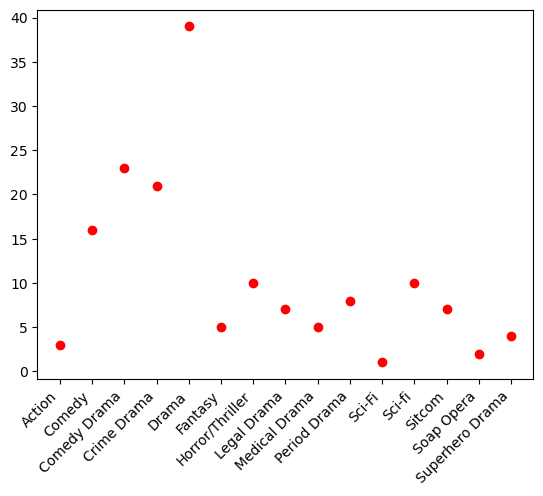

In [616]:
plt.scatter(zero_deaths['Genre'], zero_deaths['Count'], label='zero gay deaths', color='red') 
plt.xticks(rotation=45, ha='right') 


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Comedy Drama'),
  Text(3, 0, 'Crime Drama'),
  Text(4, 0, 'Drama'),
  Text(5, 0, 'Fantasy'),
  Text(6, 0, 'Horror/Thriller'),
  Text(7, 0, 'Legal Drama'),
  Text(8, 0, 'Medical Drama'),
  Text(9, 0, 'Period Drama'),
  Text(10, 0, 'Sci-Fi'),
  Text(11, 0, 'Sci-fi'),
  Text(12, 0, 'Soap Opera'),
  Text(13, 0, 'Superhero Drama')])

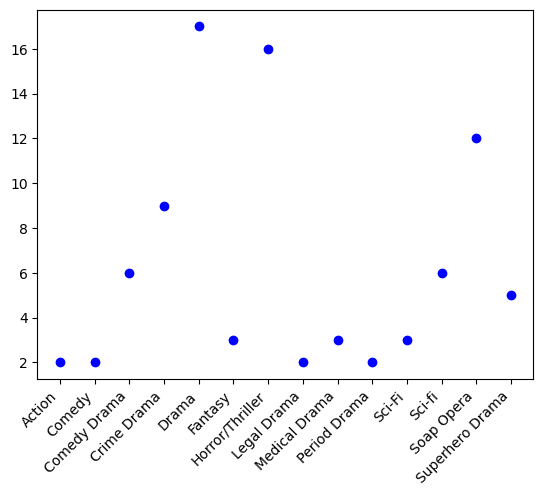

In [617]:
plt.scatter(more_than_zero['Genre'], more_than_zero['Count'], label='more than zero gay deaths', color='blue') # plot for more
plt.xticks(rotation=45, ha='right')

Clearly we can see that there does exist a sort of relashionship between the genre of a show and whether it has gay character deaths. 

# Calculating Averages

In [620]:
# want to find the average amount of shows that would have a gay character death

average_gay_deaths = df['# of Gay Deaths'].mean() *100 # calculates mean and *100 converts it into percentage
print(average_gay_deaths) 

55.42168674698795


55% of the shows in the data set on average, will have gay character death. 

In [622]:
zero_gay_deaths = df[df['# of Gay Deaths'] == 0]
average_no_deaths = zero_gay_deaths.shape[0]/data.shape[0] *100  # calculates mean and converts into percentage
print(average_no_deaths)

64.65863453815261


### 64% of the shows in the data set on avereage have zero character deaths. 

We can see that on average, it is more likely for a tv show with gay characters to have zero gay character deaths. 

# Applying A Linear Regression Model

Next, I will apply a linear regression model onto this data set in order to see which variables from the data will more correlate with gay character deaths, in this case queer female character deaths. 

In [627]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [628]:
# we will start by cleaning the dataset, we will use the original/raw set (no revisions)
df = pd.read_csv('Shows_with_Female_Queer_Characters.csv')
df.head()
df = df.dropna()
df.head()


,Show Name,# of Episodes,# of Gay Deaths,# of Gay Characters,Genre,Do People Die?,Show Start Date,Show End Date
0,911,79,0,3,Drama,Yes,3/31/2015,4/25/2022
1,13 Reasons Why,49,1,3,Drama,Yes,3/31/2017,6/5/2020
2,1600 Penn,13,0,1,Sitcom,No,12/17/2012,3/28/2013
3,19-2,38,0,1,Crime Drama,Yes,1/29/2014,9/18/2017
4,A Discovery of Witches,25,0,2,Fantasy,Yes,9/14/2018,1/19/2022


In [629]:
# I will use the variables "# of Gay Deaths", "Genre", and "# of Gay Characters"

# making features and target
X = df[['# of Gay Characters', 'Genre']] 
y = df['# of Gay Deaths'] 

from sklearn.preprocessing import OneHotEncoder
X = pd.get_dummies(X, columns=['Genre'], drop_first=True)
# splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y)

# creating model
model = LinearRegression()
model.fit(X_train, y_train)

# prediction code
y_prediction = model.predict(X_test)

# evaluating mse and r2
mse_value = mean_squared_error(y_test, y_prediction)
r2_value = r2_score(y_test, y_pred)

# printing values
print(f"Mean Squared Error: {mse_value}")
print(f"R2 Score: {r2_value}")


Mean Squared Error: 0.5835647763435687
R2 Score: -0.13163379379610674


### SMALL ANALYSIS: 
MSE is .44 meaning, this model seems like a good fit for the dataset. On average about 44% of these shows will have gay character deaths. On the otherhand, based on the R2 score of -0.1498, this model might not be a good fit for this given dataset. 

# Conclusion

Based on the data that has been analyzed, there does seem to be a slight correlation between genre and gay character deaths. When dividing the data based on "zero gay deaths" and "more than zero deaths", the difference in numbers is quite obvious. Some genres have a lot of shows with gay deaths and other may not have as many shows without those deaths. The "Drama" genre showed high amounts of both shows with gay character deaths and no gay character deaths. 

Based on the linear regression model, it seems like there is not much of a correlation between a show's genre and whether or not there are gay character deaths. The very low R2 score is very telling in this case, where as the MSE is kind of close to the average value for deaths that I had found. 

# References

Shows with female queer characters csv was obtained from Kaggle.
https://www.kaggle.com/datasets/carlyscolvin/tv-shows-with-female-queer-characters

One-Hot Encoding was obtained from chatGPT in order to allow for "Genre" to be fitted into the linear regression model.

Math 10 Class Notes